In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
import ast

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

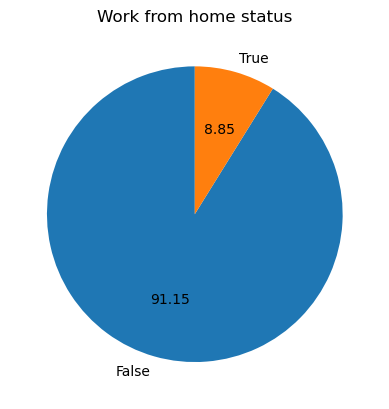

In [27]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%.2f')
plt.title('Work from home status')
plt.ylabel('')
plt.show()

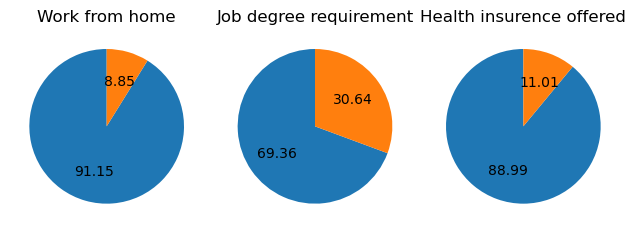

In [35]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job degree requirement',
    'job_health_insurance': 'Health insurence offered'
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%.2f')
    ax[i].set_title(title)
    
plt.tight_layout()
plt.show()